In [1]:
import pandas as pd
import numpy as np


from AnalyzeSrc.HandlingMissingData import (
    MissingValueHandler,
    CategoricalMissingFeatureStrategy,
    StatisticalModelImputationStrategy,
    KNNImputationStrategy,
    FillMissingValuesStrategy,
    DropMissingValuesStrategy
)

from AnalyzeSrc.EncodingStrategies import (
    CategoricalFeatureEncoder
)

from AnalyzeSrc.MissingValueAnalysis import SimpleMissingValuesAnalysis

In [2]:
# Load the data
# Assuming you have already extracted the data into the 'Dataset/Extracted/' folder

train_data_path = '../Dataset/Extracted/train.csv'
test_data_path = '../Dataset/Extracted/test.csv'
sample_submission_path = '../Dataset/Extracted/sample_submission.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)
sample_submission_df = pd.read_csv(sample_submission_path)

In [3]:
# Step 1: Handle `error_code` missing values as a feature

missing_value_handler = MissingValueHandler(CategoricalMissingFeatureStrategy(
    column_name = 'error_code',
    fill_value = 'No Error'
))

train_df_copy = missing_value_handler.handle_missing_values(train_df)

# Step 2: Encode the categorical features `error_code`

encoder = CategoricalFeatureEncoder(encoding_type='one_hot')
train_df = encoder.encode_feature(train_df, 'error_code')
train_df.drop('error_code_is_missing', axis = 1, inplace=True)

# Step 3: Encode the installation type
encoder = CategoricalFeatureEncoder(encoding_type='one_hot')
train_df = encoder.encode_feature(train_df, 'installation_type')

# Step 4: Impute numerical feature missing values
missing_value_handler.set_strategy(StatisticalModelImputationStrategy(
        model_type='catboost',
        iterations=100,
        learning_rate=0.01
    ))

columns_to_clean = ['temperature', 'irradiance', 'panel_age', 'maintenance_count', 'soiling_ratio', 'voltage', 'current', 'module_temperature', 'cloud_coverage']

train_df = missing_value_handler.handle_missing_values(train_df, columns=columns_to_clean)

print('\nCatBoost Imputed DataFrame:')
print(train_df[columns_to_clean].describe())
train_df


2025-06-26 21:17:24,275 - INFO - Executing missing value handling strategy.
2025-06-26 21:17:24,277 - INFO - Handling missing values in categorical column 'error_code' as a feature
2025-06-26 21:17:24,288 - INFO - Created missing indicator feature 'error_code_is_missing'
2025-06-26 21:17:24,289 - INFO - Filled missing values in 'error_code' with 'No Error'
2025-06-26 21:17:24,395 - INFO - Switching missing value handling strategy.
2025-06-26 21:17:24,397 - INFO - Executing missing value handling strategy.
2025-06-26 21:17:24,399 - INFO - Imputing missing values using catboost model
2025-06-26 21:17:25,449 - INFO - Imputed missing values for column temperature
2025-06-26 21:17:26,180 - INFO - Imputed missing values for column irradiance
2025-06-26 21:17:26,807 - INFO - Imputed missing values for column panel_age
2025-06-26 21:17:27,397 - INFO - Imputed missing values for column maintenance_count
2025-06-26 21:17:28,015 - INFO - Imputed missing values for column soiling_ratio
2025-06-26 


CatBoost Imputed DataFrame:
        temperature    irradiance     panel_age  maintenance_count  \
count  20000.000000  20000.000000  20000.000000       20000.000000   
mean      25.080812    501.318661     17.509516           4.012190   
std       12.284384    245.178552      9.839069           1.950197   
min        0.000000   -597.278646      0.001264           0.000000   
25%       17.008809    343.009829      9.238113           3.000000   
50%       24.697426    498.221174     17.487600           4.000000   
75%       32.622768    659.345945     25.832048           5.000000   
max      147.394168   1537.810349     34.998379          15.000000   

       soiling_ratio       voltage       current  module_temperature  \
count   20000.000000  20000.000000  20000.000000        20000.000000   
mean        0.698880     16.234950      1.713358           29.919706   
std         0.167839     17.448481      1.126546           11.921810   
min         0.400149      0.000000      0.000054    

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,...,pressure,string_id,efficiency,error_code_E00,error_code_E01,error_code_E02,installation_type_is_missing,installation_type_dual-axis,installation_type_fixed,installation_type_tracking
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,...,1018.8665053152533,A1,0.562096,0.0,0.0,0.0,1,0.0,0.0,0.0
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,...,1025.6238537572883,D4,0.396447,1.0,0.0,0.0,0,1.0,0.0,0.0
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,...,1010.9226539809573,C3,0.573776,1.0,0.0,0.0,1,0.0,0.0,0.0
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,...,1021.8466633134253,A1,0.629009,0.0,0.0,0.0,0,1.0,0.0,0.0
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,...,1008.5559577591927,B2,0.341874,1.0,0.0,0.0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,16.868428,570.897736,93.53031757838667,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,...,1018.3744670739436,B2,0.664907,0.0,0.0,1.0,0,0.0,0.0,1.0
19996,19996,53.415061,296.970303,93.98571391279083,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,...,1016.081102065643,D4,0.354070,1.0,0.0,0.0,0,0.0,1.0,0.0
19997,19997,2.442727,660.328019,37.9689180401391,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,...,1009.6844614602336,D4,0.419734,0.0,0.0,0.0,0,0.0,0.0,1.0
19998,19998,19.640703,632.760700,43.01470184078199,19.063517,4.0,0.697650,0.000000,1.068906,21.149351,...,1006.6738746072241,A1,0.661963,1.0,0.0,0.0,0,0.0,0.0,1.0


In [4]:
# Feature Selection

In [5]:
train_df['power'] = train_df['voltage'] * train_df['current']
train_df['area'] = train_df['power'] / train_df['efficiency']

train_df = train_df.dropna(subset = ['area'])


Missing Values Count by Column:
Series([], dtype: int64)

Visualizing Missing Values...


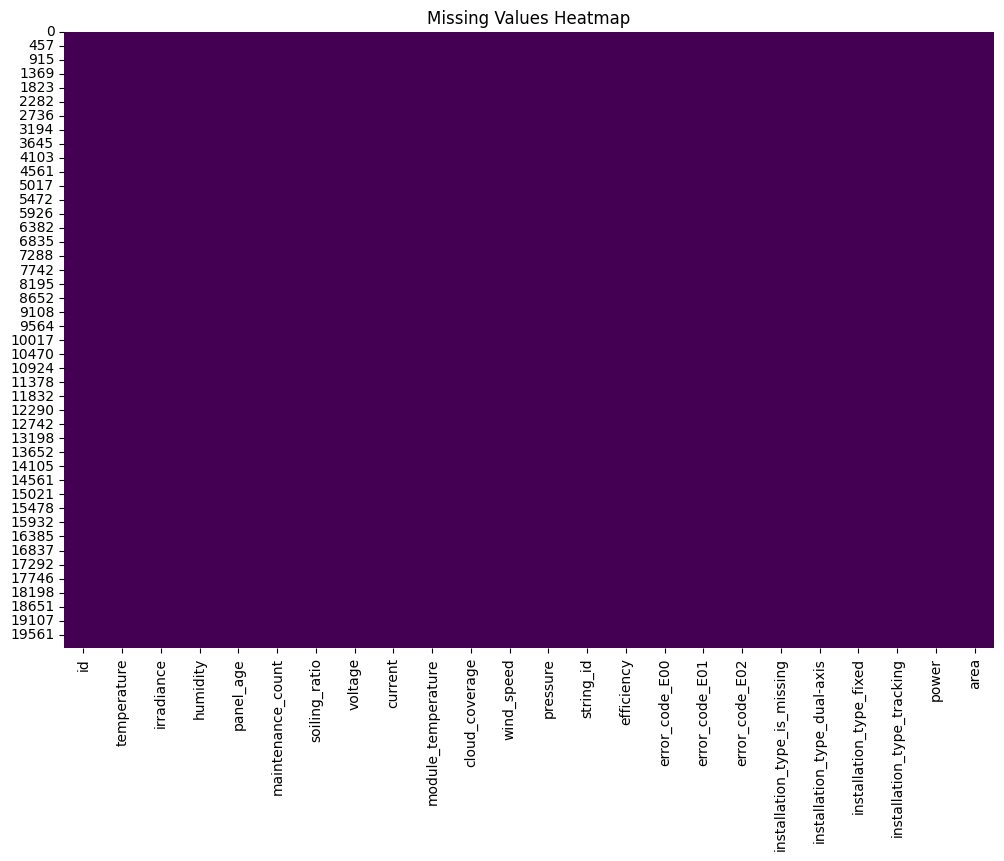

In [6]:
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(train_df)

In [7]:
# Doing for test data

In [8]:
# Step 1: Handle `error_code` missing values as a feature

missing_value_handler = MissingValueHandler(CategoricalMissingFeatureStrategy(
    column_name = 'error_code',
    fill_value = 'No Error'
))

test_df_copy = missing_value_handler.handle_missing_values(test_df)

# Step 2: Encode the categorical features `error_code`

encoder = CategoricalFeatureEncoder(encoding_type='one_hot')
test_df = encoder.encode_feature(test_df, 'error_code')
test_df.drop('error_code_is_missing', axis = 1, inplace=True)

# Step 3: Encode the installation type
encoder = CategoricalFeatureEncoder(encoding_type='one_hot')
test_df = encoder.encode_feature(test_df, 'installation_type')

# Step 4: Impute numerical feature missing values
missing_value_handler.set_strategy(StatisticalModelImputationStrategy(
        model_type='catboost',
        iterations=100,
        learning_rate=0.01
    ))

columns_to_clean = ['temperature', 'irradiance', 'panel_age', 'maintenance_count', 'soiling_ratio', 'voltage', 'current', 'module_temperature', 'cloud_coverage']

test_df = missing_value_handler.handle_missing_values(test_df, columns=columns_to_clean)

print('\nCatBoost Imputed DataFrame:')
print(test_df[columns_to_clean].describe())
test_df


2025-06-26 21:17:46,103 - INFO - Executing missing value handling strategy.
2025-06-26 21:17:46,105 - INFO - Handling missing values in categorical column 'error_code' as a feature
2025-06-26 21:17:46,113 - INFO - Created missing indicator feature 'error_code_is_missing'
2025-06-26 21:17:46,114 - INFO - Filled missing values in 'error_code' with 'No Error'
2025-06-26 21:17:46,182 - INFO - Switching missing value handling strategy.
2025-06-26 21:17:46,185 - INFO - Executing missing value handling strategy.
2025-06-26 21:17:46,188 - INFO - Imputing missing values using catboost model
2025-06-26 21:17:46,758 - INFO - Imputed missing values for column temperature
2025-06-26 21:17:47,337 - INFO - Imputed missing values for column irradiance
2025-06-26 21:17:47,909 - INFO - Imputed missing values for column panel_age
2025-06-26 21:17:48,488 - INFO - Imputed missing values for column maintenance_count
2025-06-26 21:17:49,042 - INFO - Imputed missing values for column soiling_ratio
2025-06-26 


CatBoost Imputed DataFrame:
        temperature    irradiance     panel_age  maintenance_count  \
count  12000.000000  12000.000000  12000.000000       12000.000000   
mean      25.149996    503.558622     17.474502           3.991843   
std       12.061186    244.857450      9.836625           1.943943   
min        0.000000   -564.252322      0.013553           0.000000   
25%       16.992745    344.612341      9.181074           3.000000   
50%       24.839984    502.674846     17.466709           4.000000   
75%       32.917018    661.186471     25.738570           5.000000   
max      145.879677   1420.627376     34.989441          13.000000   

       soiling_ratio       voltage       current  module_temperature  \
count   12000.000000  12000.000000  12000.000000        12000.000000   
mean        0.700481     16.519859      1.709635           30.038950   
std         0.168016     17.985715      1.121387           12.009508   
min         0.400042      0.000000      0.000065    

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,...,wind_speed,pressure,string_id,error_code_E00,error_code_E01,error_code_E02,installation_type_is_missing,installation_type_dual-axis,installation_type_fixed,installation_type_tracking
0,0,17.618379,85.449838,90.81542277591531,13.910963,6.0,0.889765,6.370396,0.069101,19.517274,...,7.1819582155525445,1034.782455188643,C3,0.0,1.0,0.0,0,0.0,0.0,1.0
1,1,34.826323,722.801748,20.98299301574633,20.916528,4.0,0.590372,30.095867,1.713852,37.421443,...,4.184581989921003,992.3197520437311,D4,1.0,0.0,0.0,1,0.0,0.0,0.0
2,2,33.776934,485.491998,55.61404977577451,1.446962,3.0,0.611425,28.424430,1.696936,32.147763,...,6.25944104775485,999.2134568588949,D4,0.0,1.0,0.0,0,1.0,0.0,0.0
3,3,18.584189,350.022720,49.04476645510075,18.810133,5.0,0.703063,7.848038,0.787188,25.734118,...,2.7696074663593944,1026.6500782154521,C3,0.0,0.0,1.0,0,1.0,0.0,0.0
4,4,43.044908,437.295622,8.761571340027164,17.349019,8.0,0.564938,12.300717,1.867620,41.458766,...,11.846974043208318,1010.809942771749,B2,0.0,0.0,0.0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,40.581656,492.446562,35.49601213333054,4.508170,8.0,0.700863,40.883724,3.434505,48.476050,...,3.135128144827662,1008.9662669972856,D4,1.0,0.0,0.0,0,0.0,0.0,1.0
11996,11996,16.958524,198.844667,4.063816084298089,4.021203,4.0,0.810999,0.000000,1.290352,23.502657,...,9.36342399338491,1023.566458245707,C3,0.0,0.0,1.0,0,0.0,0.0,1.0
11997,11997,24.055333,757.621634,2.7976698608970785,15.253932,3.0,0.695248,5.855590,4.835729,31.908375,...,14.3559453768628,1011.6658283571514,A1,1.0,0.0,0.0,1,0.0,0.0,0.0
11998,11998,15.623725,177.376256,0.6710490966069793,16.437613,2.0,0.861087,0.000000,1.159060,23.835495,...,6.95866488523872,1017.6572634664706,B2,0.0,0.0,0.0,0,1.0,0.0,0.0


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Compute 'power' feature in test data
test_df['power'] = test_df['voltage'] * test_df['current']
test_df['area'] = ''  # placeholder to be overwritten

# Clean training data
train_df = train_df[pd.to_numeric(train_df['area'], errors='coerce').notna()]
train_df = train_df[~train_df['area'].isin([float('inf'), float('-inf')])]

# Define features and target
features = ['temperature', 'irradiance', 'module_temperature', 'power']
X_train = train_df[features]
y_train = train_df['area']
X_test = test_df[features]

# Ensure all values are numeric and fill missing ones
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Print some diagnostics
print("Missing values in y_train:", y_train.isna().sum())
print("Data type of y_train:", y_train.dtype)

# Initialize and train Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)
model.fit(X_train, y_train)

# Predict on test data and assign back
predicted_area = model.predict(X_test)
test_df['area'] = predicted_area


Missing values in y_train: 0
Data type of y_train: float64


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished



Missing Values Count by Column:
Series([], dtype: int64)

Visualizing Missing Values...


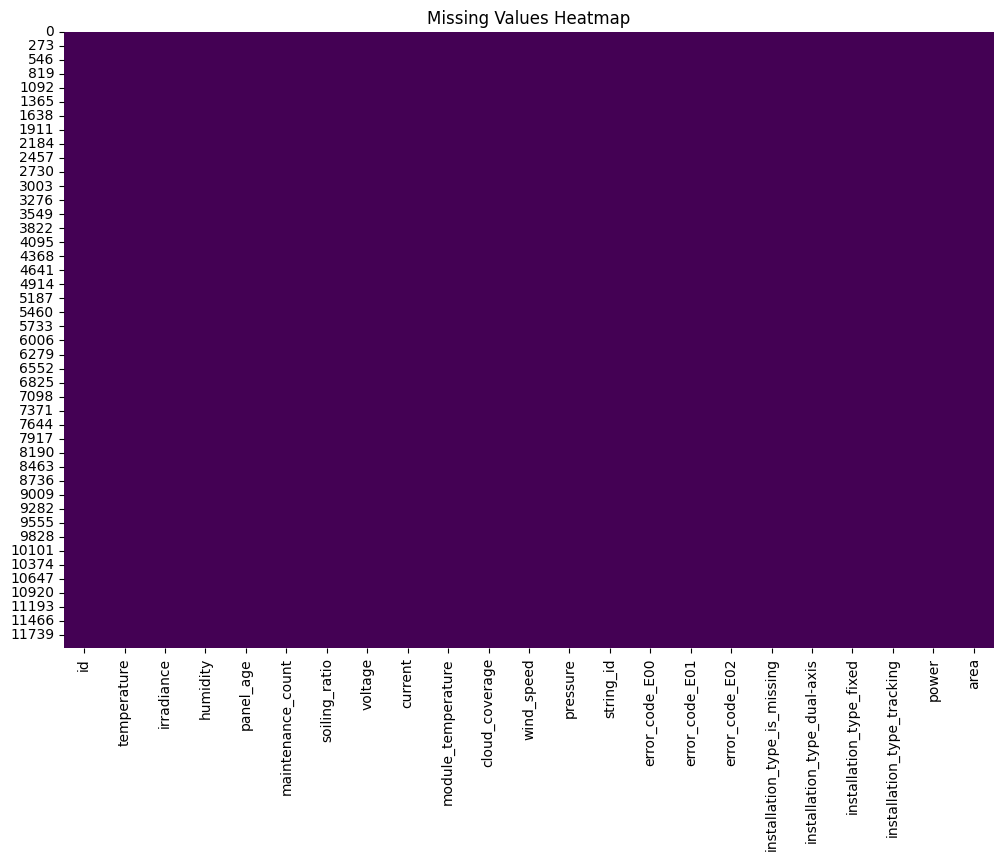

In [10]:
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(test_df)

In [11]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [12]:
from Src.ModelBuilding import ModelBuilder, XGBoostStrategy

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns=['efficiency']),train_df['efficiency'], test_size=0.2, random_state=123 )

In [23]:
train_df

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,...,efficiency,error_code_E00,error_code_E01,error_code_E02,installation_type_is_missing,installation_type_dual-axis,installation_type_fixed,installation_type_tracking,power,area
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,...,0.562096,0.0,0.0,0.0,1,0.0,0.0,0.0,73.452561,130.676128
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,...,0.396447,1.0,0.0,0.0,0,1.0,0.0,0.0,5.274577,13.304608
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,...,0.573776,1.0,0.0,0.0,1,0.0,0.0,0.0,202.140687,352.298934
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,...,0.629009,0.0,0.0,0.0,0,1.0,0.0,0.0,44.470168,70.698753
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,...,0.341874,1.0,0.0,0.0,0,0.0,1.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,16.868428,570.897736,93.53031757838667,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,...,0.664907,0.0,0.0,1.0,0,0.0,0.0,1.0,36.508185,54.907238
19996,19996,53.415061,296.970303,93.98571391279083,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,...,0.354070,1.0,0.0,0.0,0,0.0,1.0,0.0,0.000000,0.000000
19997,19997,2.442727,660.328019,37.9689180401391,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,...,0.419734,0.0,0.0,0.0,0,0.0,0.0,1.0,53.176896,126.691799
19998,19998,19.640703,632.760700,43.01470184078199,19.063517,4.0,0.697650,0.000000,1.068906,21.149351,...,0.661963,1.0,0.0,0.0,0,0.0,0.0,1.0,0.000000,0.000000


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19369 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            19369 non-null  int64  
 1   temperature                   19369 non-null  float64
 2   irradiance                    19369 non-null  float64
 3   humidity                      19369 non-null  object 
 4   panel_age                     19369 non-null  float64
 5   maintenance_count             19369 non-null  float64
 6   soiling_ratio                 19369 non-null  float64
 7   voltage                       19369 non-null  float64
 8   current                       19369 non-null  float64
 9   module_temperature            19369 non-null  float64
 10  cloud_coverage                19369 non-null  float64
 11  wind_speed                    19369 non-null  object 
 12  pressure                      19369 non-null  object 
 13  string

In [17]:
model_builder = ModelBuilder(XGBoostStrategy())
xgb_model = model_builder.build_model(X_train, y_train)

2025-06-26 21:26:12,760 - INFO - Building and training the model using the selected strategy.
2025-06-26 21:26:12,762 - INFO - Initializing XGBoost model with scaling.
2025-06-26 21:26:12,764 - INFO - Training XGBoost model.


ValueError: could not convert string to float: 'error'